In [ ]:
# Add custom dataset to directory
!mkdir /content/custom-dataset/
!cp /content/content/test.csv /content/custom-dataset/
!cp /content/content/train.csv /content/custom-dataset/

Best Parameters svc: {'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}


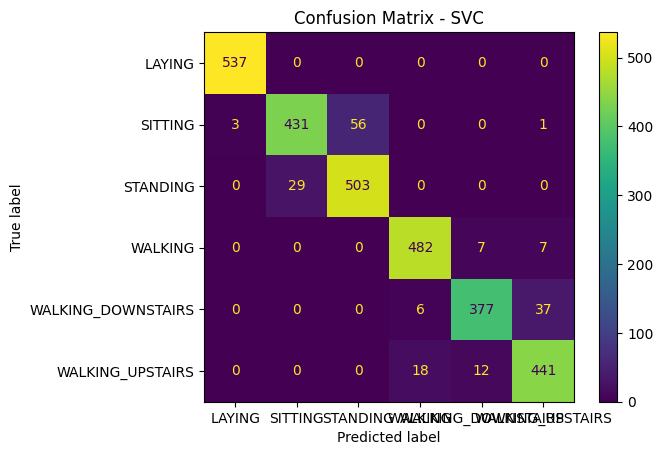


Classification Report svc:
                     precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.94      0.88      0.91       491
          STANDING       0.90      0.95      0.92       532
           WALKING       0.95      0.97      0.96       496
WALKING_DOWNSTAIRS       0.95      0.90      0.92       420
  WALKING_UPSTAIRS       0.91      0.94      0.92       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947

Train accuracy: 0.99
Test accuracy:  0.94
Test accuracy:  0.94


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import os



# Read the uploaded CSV files
train_data = pd.read_csv("/content/custom-dataset/train.csv")
test_data = pd.read_csv("/content/custom-dataset/test.csv")

# Split features and labels
x_train = train_data.drop(columns=['Activity','subject'])
y_train = train_data['Activity']
x_test = test_data.drop(columns=['Activity', 'subject'])
y_test = test_data['Activity']

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

# Define SVM model and hyperparameter grid
model_svc = SVC()
param_grid_svc = {
    'C': list(range(1, 11)),  # C = 1 to 10
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search with 5-fold cross-validation
grid_svc = GridSearchCV(model_svc, param_grid_svc, cv=5, scoring='accuracy')
grid_svc.fit(X_train_pca, y_train)

# Best model and predictions
best_svc = grid_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test_pca)

# Output results
print("Best Parameters svc:", grid_svc.best_params_)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc)
plt.title("Confusion Matrix - SVC")
plt.show()

print("\nClassification Report svc:\n", classification_report(y_test, y_pred_svc))

# Accuracy on train and test sets
train_accuracy = best_svc.score(X_train_pca, y_train)
test_accuracy = best_svc.score(X_test_pca, y_test)

print(f"Train accuracy: {train_accuracy:.2f}")
print(f"Test accuracy:  {test_accuracy:.2f}")
print(f"Test accuracy:  {test_accuracy:.2f}")